# Учимся работе с данными - от загрузки до моделирования

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

print("Первые 5 строк:")
display(df.head())

print("\nИнформация о датасете:")
df.info()

print("\nПропущенные значения:", df.isnull().sum().sum())
print("\nРаспределение диагнозов:")
print(df['diagnosis'].value_counts())

Первые 5 строк:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  ar

In [3]:
df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})

features = [col for col in df.columns if col not in ['diagnosis', 'target']]
print(f"Количество признаков: {len(features)}")

Количество признаков: 30


In [4]:
df[features].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


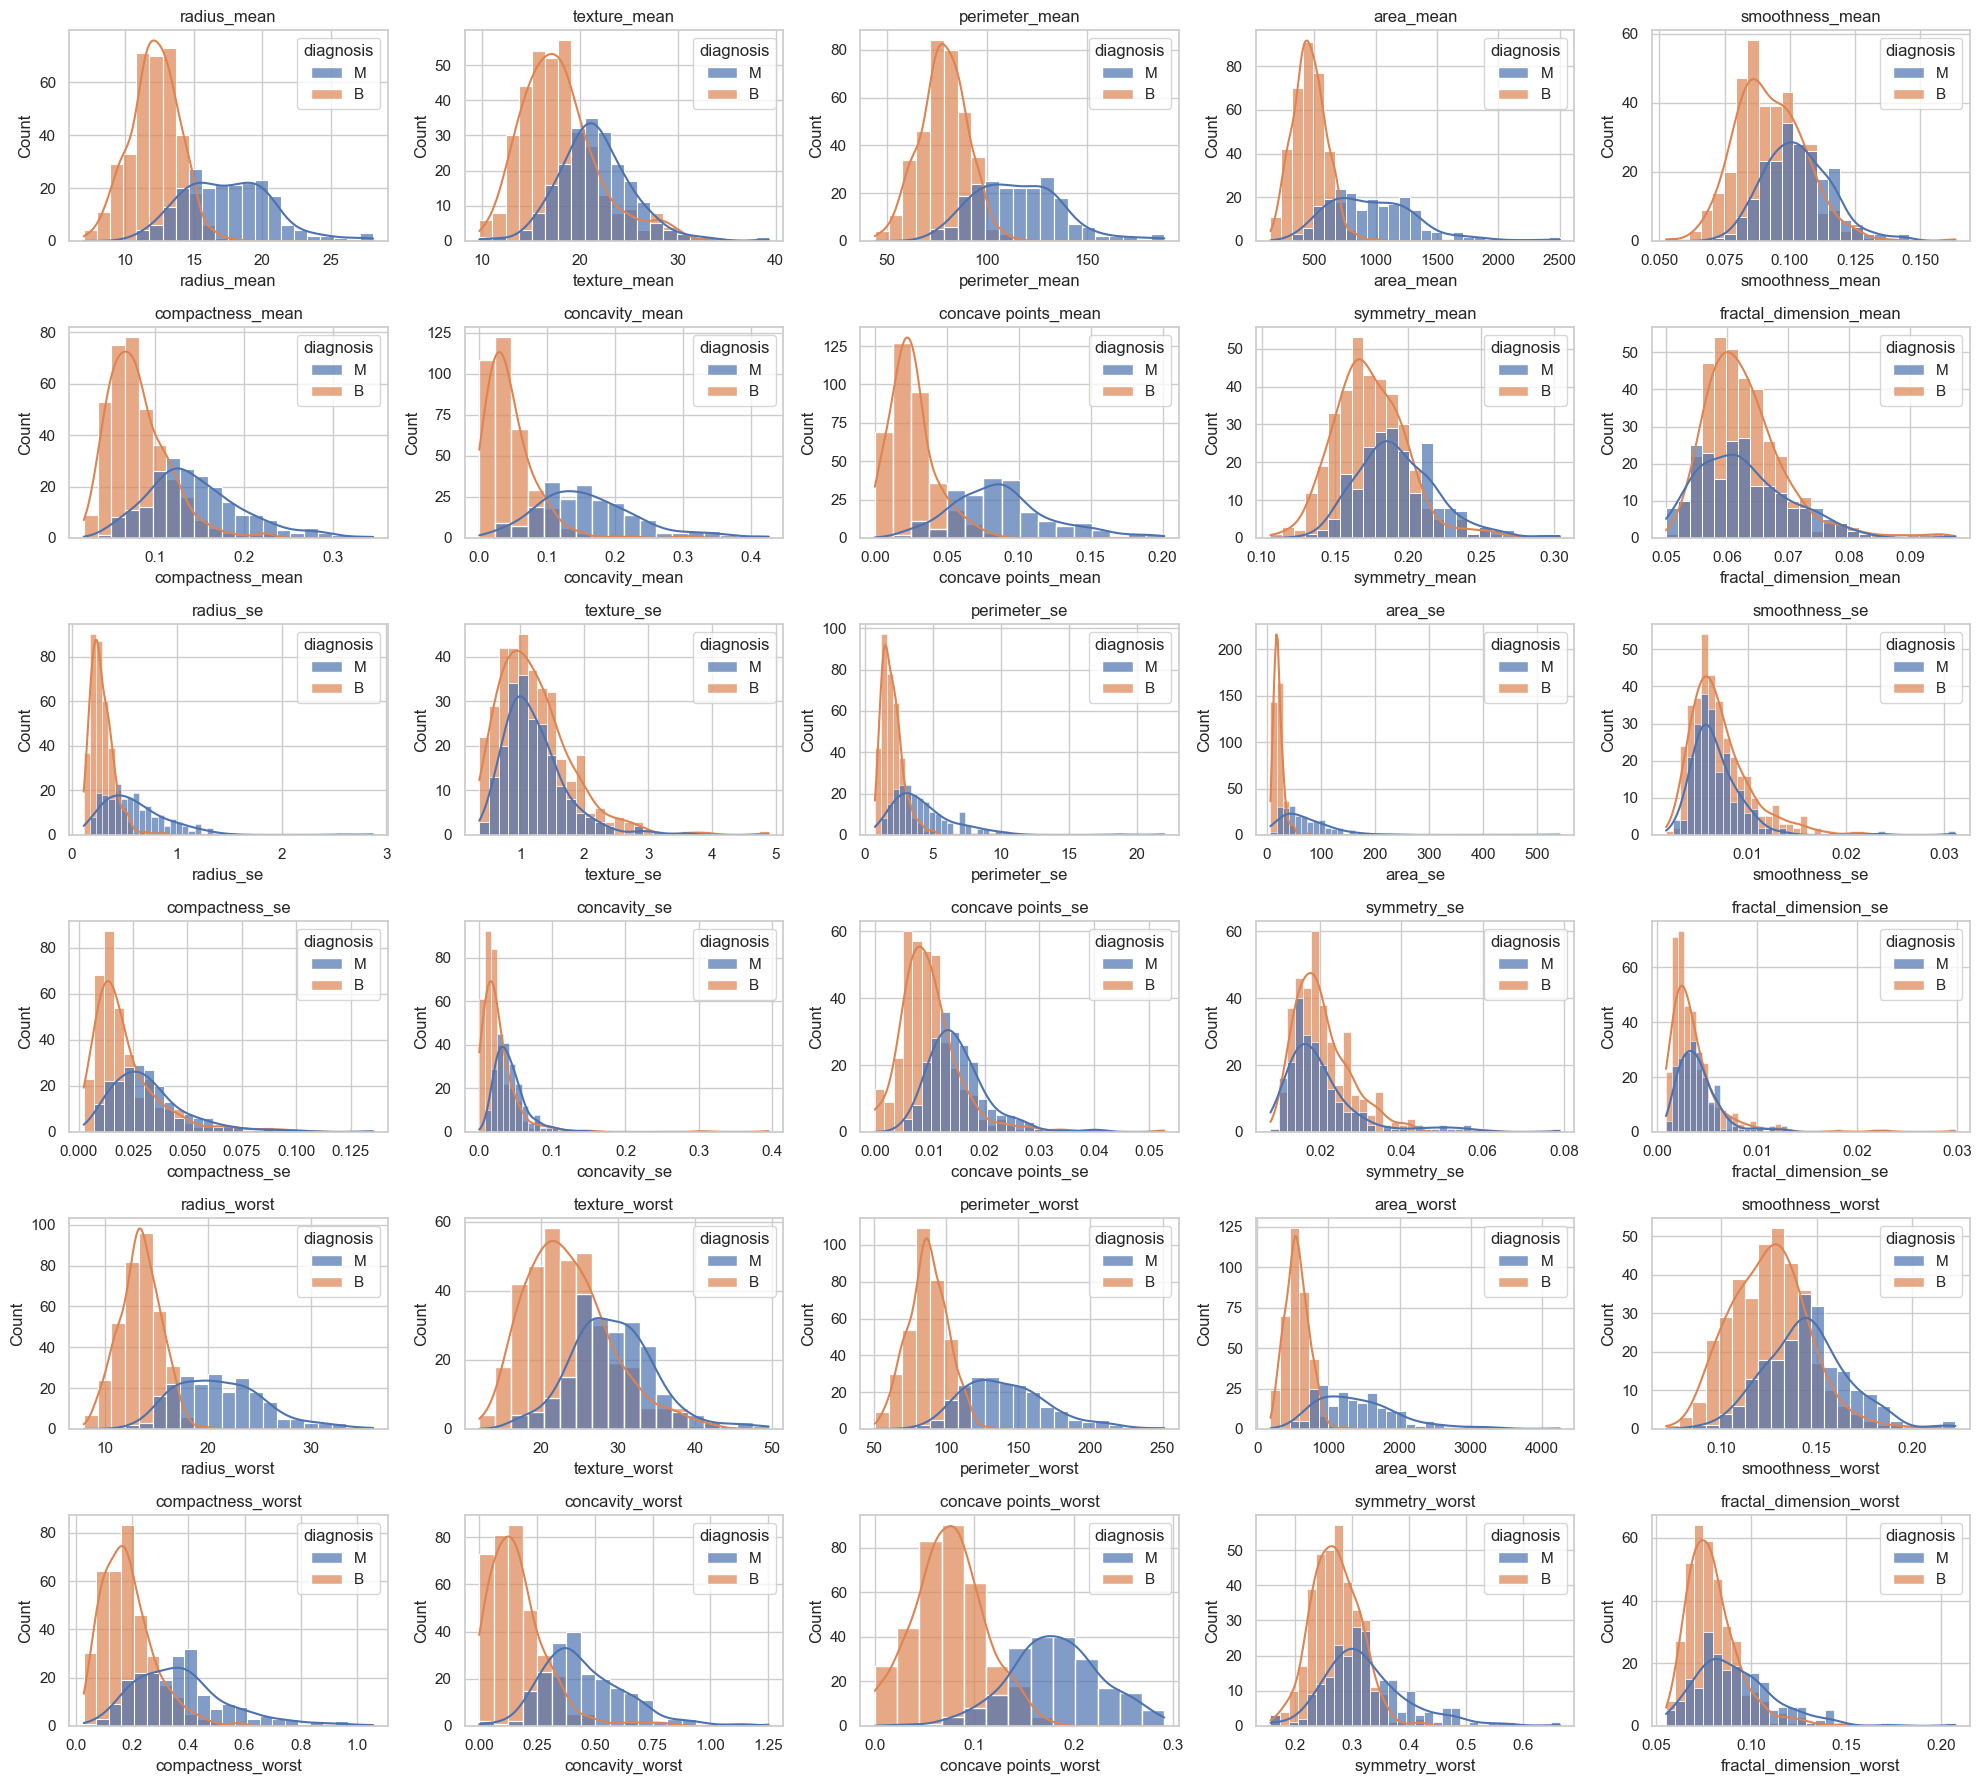

In [5]:
fig, axes = plt.subplots(6, 5, figsize=(20, 18))
axes = axes.ravel()

for i, col in enumerate(features):
    sns.histplot(data=df, x=col, hue='diagnosis', kde=True, ax=axes[i], alpha=0.7)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

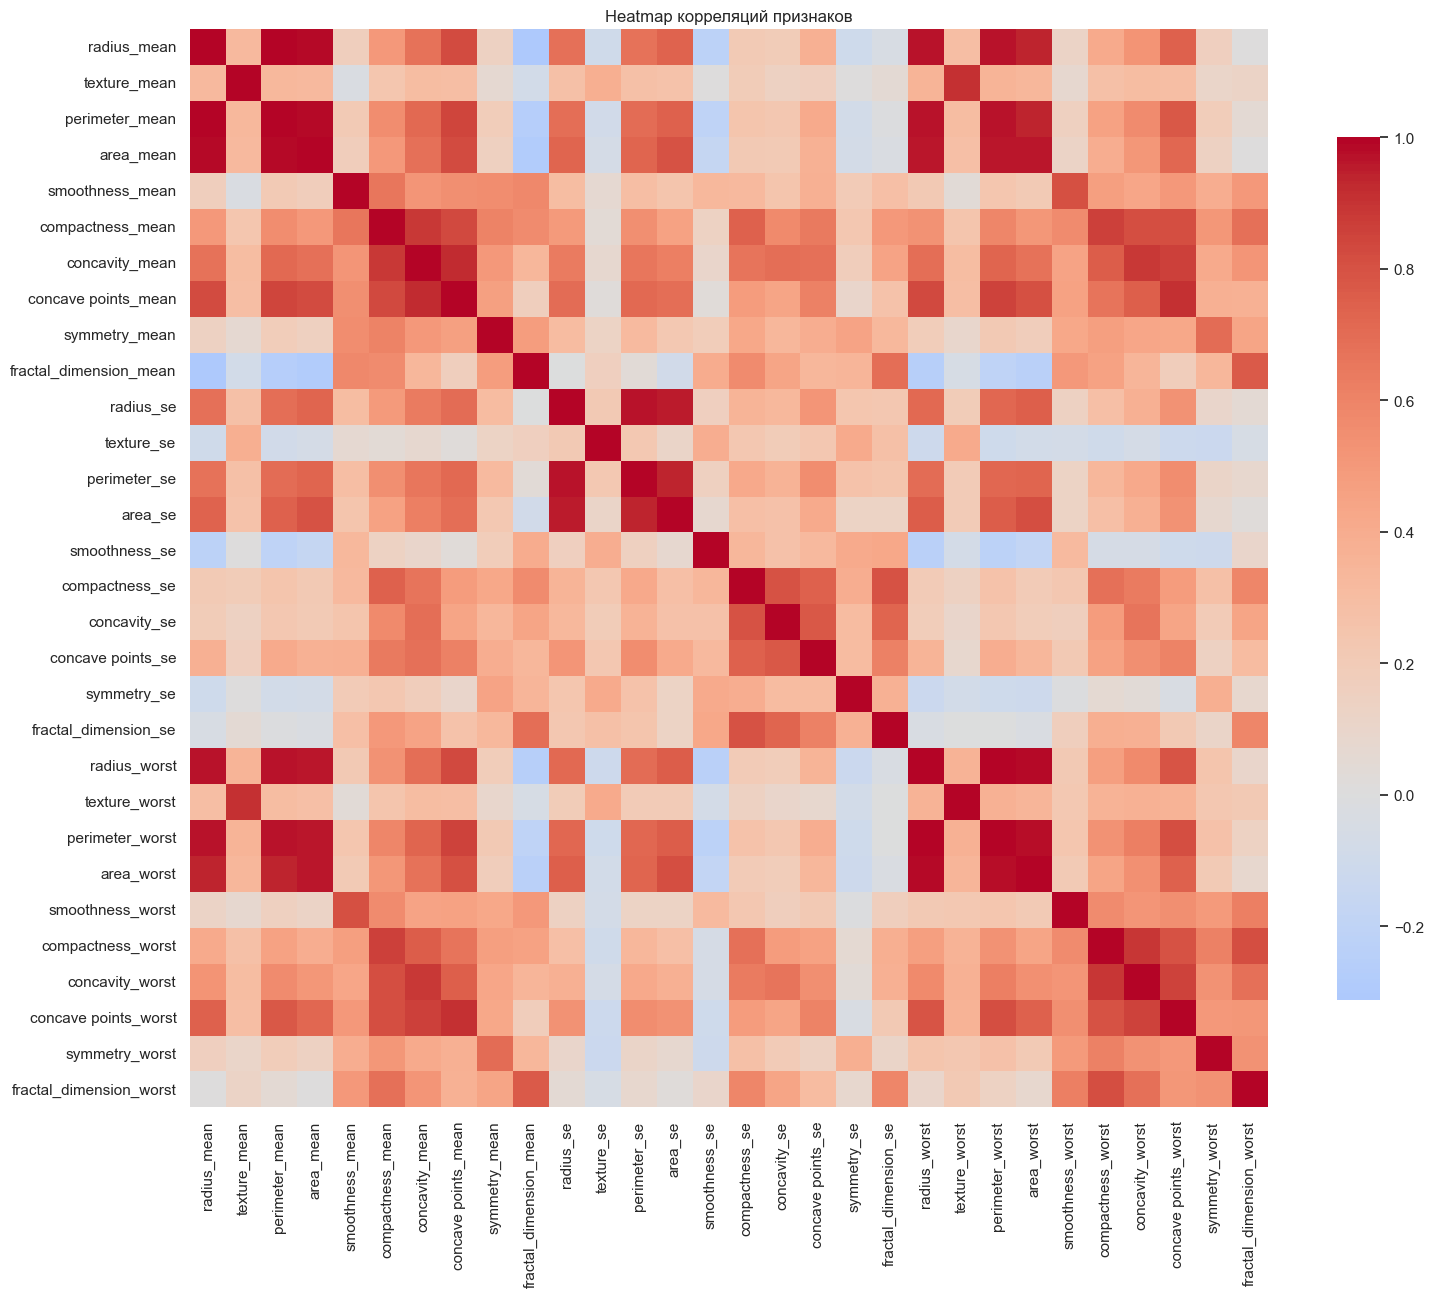

In [6]:
corr = df[features].corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap корреляций признаков')
plt.show()

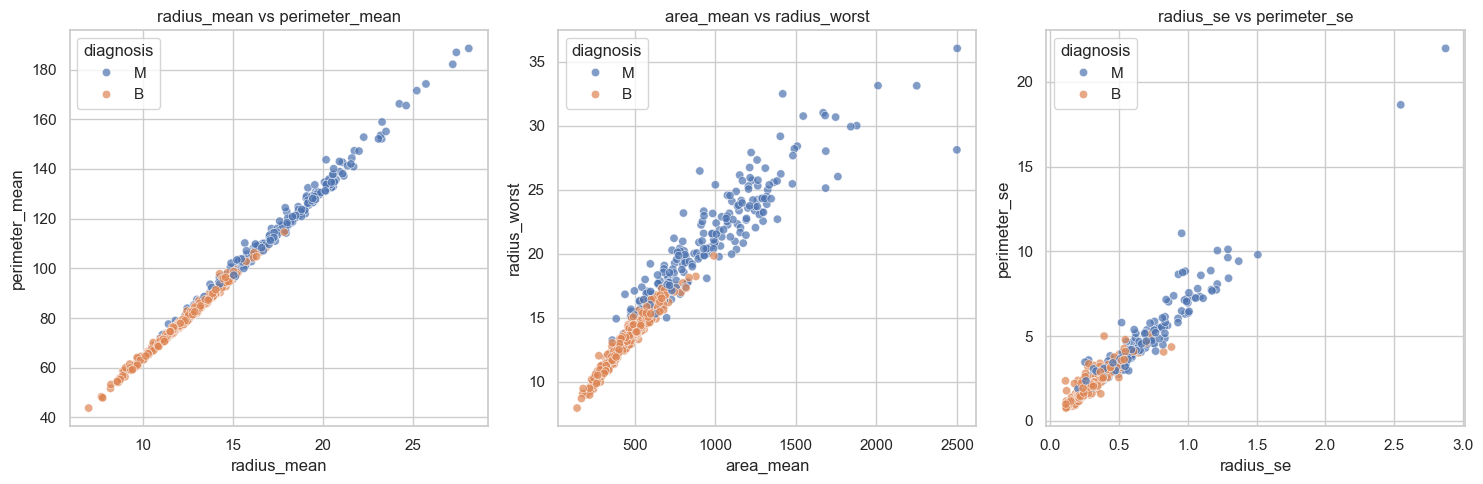

In [7]:
high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        val = corr.iloc[i, j]
        if abs(val) > 0.95:
            high_corr_pairs.append((corr.columns[i], corr.columns[j]))

unique_pairs = []
seen = set()
for a, b in high_corr_pairs:
    if a not in seen and b not in seen:
        unique_pairs.append((a, b))
        seen.add(a)
        seen.add(b)
    if len(unique_pairs) == 3:
        break

fig, axes = plt.subplots(1, len(unique_pairs), figsize=(5*len(unique_pairs), 5))
if len(unique_pairs) == 1:
    axes = [axes]

for idx, (x, y) in enumerate(unique_pairs):
    sns.scatterplot(data=df, x=x, y=y, hue='diagnosis', ax=axes[idx], alpha=0.7)
    axes[idx].set_title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

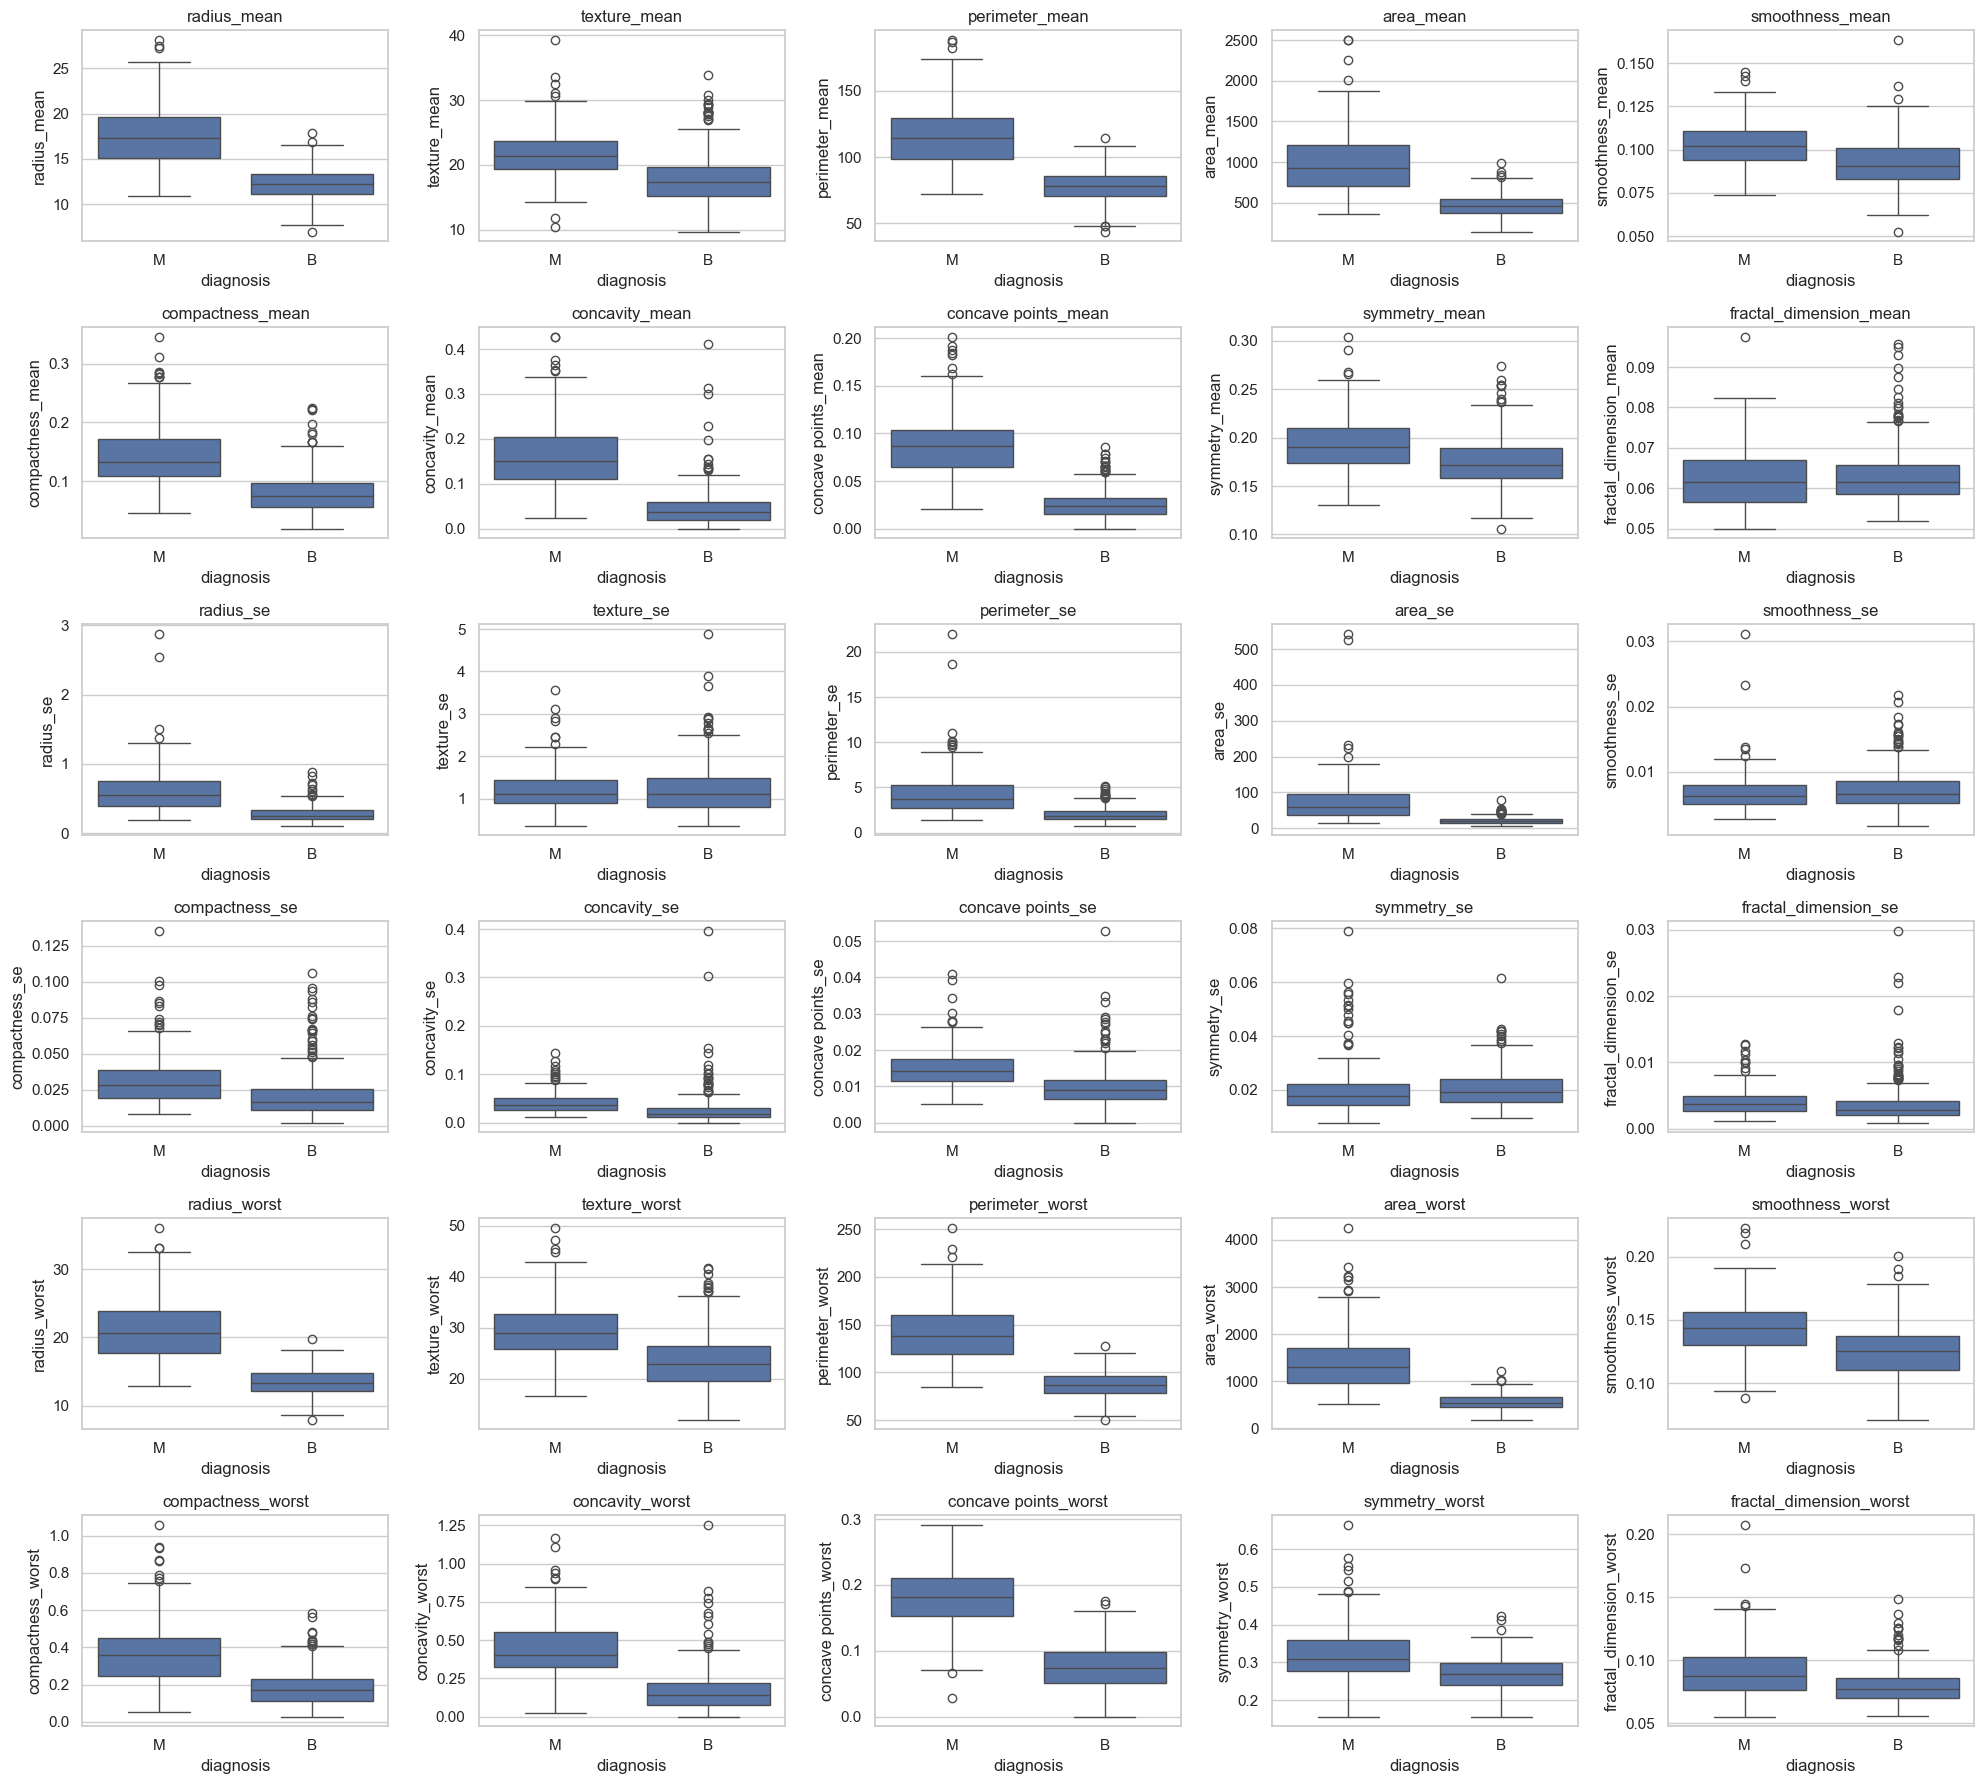

In [8]:
fig, axes = plt.subplots(6, 5, figsize=(20, 18))
axes = axes.ravel()

for i, col in enumerate(features):
    sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [9]:
X = df[features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Размер обучающей выборки:", X_train_scaled.shape)
print("Размер тестовой выборки:", X_test_scaled.shape)

Размер обучающей выборки: (398, 30)
Размер тестовой выборки: (171, 30)


In [10]:
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train_scaled, y_train)

y_pred_default = knn_default.predict(X_test_scaled)
y_pred_proba_default = knn_default.predict_proba(X_test_scaled)[:, 1]

metrics_default = {
    'Accuracy': accuracy_score(y_test, y_pred_default),
    'Precision': precision_score(y_test, y_pred_default),
    'Recall': recall_score(y_test, y_pred_default),
    'F1-score': f1_score(y_test, y_pred_default),
    'AUC': roc_auc_score(y_test, y_pred_proba_default)
}

print("Метрики kNN (k=5):")
for name, val in metrics_default.items():
    print(f"{name}: {val:.4f}")

Метрики kNN (k=5):
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9062
F1-score: 0.9508
AUC: 0.9882


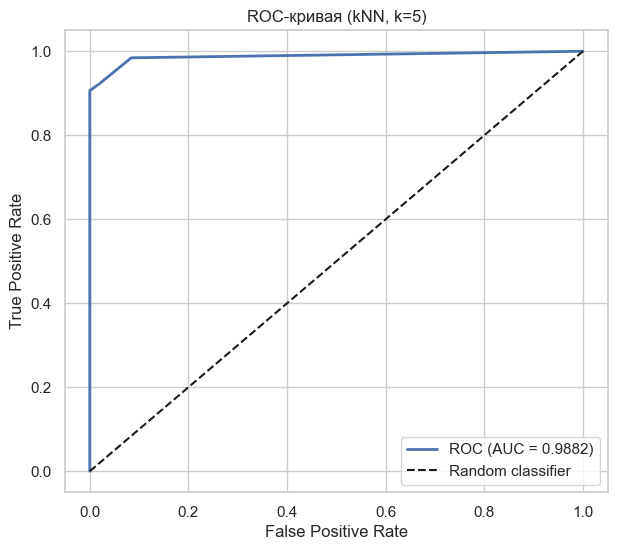

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_default)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {metrics_default["AUC"]:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая (kNN, k=5)')
plt.legend()
plt.grid(True)
plt.show()

Лучшее k: 5
Лучшая CV Accuracy: 0.9697


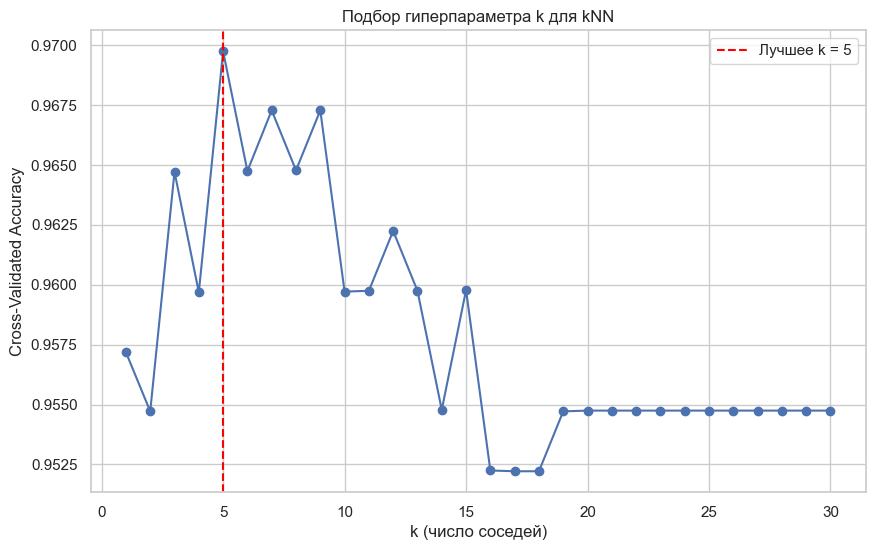

In [12]:
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_range[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f"Лучшее k: {best_k}")
print(f"Лучшая CV Accuracy: {best_score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o')
plt.axvline(best_k, color='red', linestyle='--', label=f'Лучшее k = {best_k}')
plt.xlabel('k (число соседей)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Подбор гиперпараметра k для kNN')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
knn_opt = KNeighborsClassifier(n_neighbors=best_k)
knn_opt.fit(X_train_scaled, y_train)

y_pred_opt = knn_opt.predict(X_test_scaled)
y_pred_proba_opt = knn_opt.predict_proba(X_test_scaled)[:, 1]

metrics_opt = {
    'Accuracy': accuracy_score(y_test, y_pred_opt),
    'Precision': precision_score(y_test, y_pred_opt),
    'Recall': recall_score(y_test, y_pred_opt),
    'F1-score': f1_score(y_test, y_pred_opt),
    'AUC': roc_auc_score(y_test, y_pred_proba_opt)
}

print("Метрики kNN (оптимальное k):")
for name, val in metrics_opt.items():
    print(f"{name}: {val:.4f}")

Метрики kNN (оптимальное k):
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9062
F1-score: 0.9508
AUC: 0.9882


In [14]:
comparison = pd.DataFrame({
    'k=5': metrics_default,
    f'k={best_k}': metrics_opt
}).T

print("Сравнение моделей:")
display(comparison.round(4))

Сравнение моделей:


,Accuracy,Precision,Recall,F1-score,AUC
k=5,0.9649,1.0,0.9062,0.9508,0.9882
